# Проект: Оценка рыночной стоимости автомобилей

## Введение
Сервис по продаже автомобилей с пробегом "Не бит, не крашен" разрабатывает приложение, которое поможет клиентам узнать рыночную стоимость своего автомобиля. Для этой цели необходимо построить модель, которая способна определять стоимость автомобиля на основе его технических характеристик, комплектации и цен других автомобилей.

## Цель проекта

Цель проекта - построить модель для определения рыночной стоимости автомобилей с пробегом. Важные критерии - качество предсказания, время обучения и предсказания. Необходимо экспериментировать с разными моделями и гиперпараметрами, чтобы найти наилучший вариант.
## Задачи проекта
1. Построить модель, способную предсказывать рыночную стоимость автомобилей с пробегом.
2. Оценить качество предсказания модели с использованием метрики RMSE (среднеквадратичная ошибка).
3. Определить время обучения и время предсказания модели.
4. Сравнить разные модели, включая не только градиентный бустинг, но и более простые алгоритмы.

## Шаги проекта

- 1. Загрузка данных
Начнем с загрузки данных из файла `/datasets/autos.csv`. Эти данные будут использоваться для обучения и тестирования моделей.

- 2. Изучение данных и предобработка
Проанализируем данные, заполним пропущенные значения, и обработаем аномалии в столбцах. Если среди признаков найдутся неинформативные, удалим их, чтобы улучшить качество модели.

- 3. Подготовка выборок для обучения
Разделим данные на обучающую и тестовую выборки. Выделим целевую переменную (стоимость автомобиля) и признаки для обучения моделей.

- 4. Обучение разных моделей
Обучим несколько разных моделей, включая градиентный бустинг (например, LightGBM) и хотя бы одну более простую модель. Попробуем разные гиперпараметры для каждой модели.

- 5. Анализ времени обучения и предсказания
Оценим время обучения и время предсказания для каждой модели. Это важно для определения эффективности моделей в реальных условиях.

- 6. Оценка качества моделей
Используем метрику RMSE для оценки качества моделей. Значение RMSE должно быть меньше 2500.

- 7. Выбор лучшей модели и тестирование
Выберем лучшую модель на основе критериев заказчика и проверим ее качество на тестовой выборке.

- Заключение



## Описание данных

Данные представлены в файле `/datasets/autos.csv` и содержат информацию о продаже автомобилей. Датасет состоит из следующих признаков:

1. `DateCrawled` — дата скачивания анкеты из базы.
2. `VehicleType` — тип автомобильного кузова.
3. `RegistrationYear` — год регистрации автомобиля.
4. `Gearbox` — тип коробки передач.
5. `Power` — мощность (л. с.).
6. `Model` — модель автомобиля.
7. `Kilometer` — пробег (км).
8. `RegistrationMonth` — месяц регистрации автомобиля.
9. `FuelType` — тип топлива.
10. `Brand` — марка автомобиля.
11. `Repaired` — информация о том, была ли машина в ремонте.
12. `DateCreated` — дата создания анкеты.
13. `NumberOfPictures` — количество фотографий автомобиля.
14. `PostalCode` — почтовый индекс владельца анкеты (пользователя).
15. `LastSeen` — дата последней активности пользователя.

Целевой признак:

- `Price` — цена автомобиля в евро.

Данный датасет предназначен для задачи регрессии, где требуется предсказать цену автомобиля на основе имеющихся признаков.

## Import

In [1]:
#!pip install catboost
#!pip install lightgbm
#!pip install category-encoders
#!pip install tensorflow
#!pip install ydata-profiling
#!pip install --upgrade Pillow
#!pip install --upgrade pip
#!pip install optuna

RANDOM_STATE = 12345

import catboost as cb
from category_encoders.cat_boost import CatBoostEncoder
from catboost import CatBoostRegressor

from time import time

import optuna

from lightgbm import LGBMRegressor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
from phik.report import plot_correlation_matrix
from phik import report

import seaborn as sns

import time
import sklearn
from sklearn.compose import ColumnTransformer



from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from category_encoders import CatBoostEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor




import warnings

import ydata_profiling
from ydata_profiling import profile_report

from math import sqrt





In [2]:
#Производим чтение файла с данными в переменную
try:
    df = pd.read_csv('/datasets/autos.csv',parse_dates=True) 
except:
    df=pd.read_csv(r'C:\Users\Admin\Desktop\Яндек-проекты\Автомобили регрессия\autos.csv',parse_dates=True)

## Предобработка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))


               Price  RegistrationYear          Power      Kilometer  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.

In [5]:
#убираем Numberof pictures,так как нули
df=df.drop('NumberOfPictures',axis=1)

In [6]:
# Фиксим даты
df['DateCrawled_YM'] = pd.to_datetime(df['DateCrawled'], format='%Y-%m-%d').dt.strftime('%Y-%m')
df['DateCreated_YM'] = pd.to_datetime(df['DateCreated'], format='%Y-%m-%d').dt.strftime('%Y-%m')
df['LastSeen_YM'] = pd.to_datetime(df['LastSeen'], format='%Y-%m-%d').dt.strftime('%Y-%m')
#Фиксим RegistrationMonth
df=df[(df['RegistrationMonth']>0)&(df['RegistrationMonth']<=12)]

In [7]:
df['RegistrationDate_YM'] = df['RegistrationYear'].astype(str) +'-' + df['RegistrationMonth'].apply(lambda x: str(x).zfill(2))


In [8]:
df=df[df['DateCrawled']>df['RegistrationDate_YM']] # убираем регистрации из будущего 

In [9]:
#Убираем скаченные записи из будущего 
df=df[df['DateCrawled']>=df['DateCreated']]

In [10]:
#удаляем дубликаты 
df=df.drop_duplicates()

In [11]:
#Проверяем нулевые значения
df.isna().sum()

DateCrawled                0
Price                      0
VehicleType             6547
RegistrationYear           0
Gearbox                 8680
Power                      0
Model                  11145
Kilometer                  0
RegistrationMonth          0
FuelType               12974
Brand                      0
Repaired               42779
DateCreated                0
PostalCode                 0
LastSeen                   0
DateCrawled_YM             0
DateCreated_YM             0
LastSeen_YM                0
RegistrationDate_YM        0
dtype: int64

In [12]:
df.head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen,DateCrawled_YM,DateCreated_YM,LastSeen_YM,RegistrationDate_YM
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016-03,2016-03,2016-04,2011-05
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016-03,2016-03,2016-04,2004-08
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03,2016-03,2016-03,2001-06


In [13]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               Price  RegistrationYear          Power      Kilometer  \
count  300941.000000     300941.000000  300941.000000  300941.000000   
mean     4798.756265       2002.515573     116.026876  127992.297494   
std      4622.060757          8.693605     176.977519   37118.187451   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1299.000000       1999.000000      75.000000  125000.000000   
50%      3099.000000       2003.000000     109.000000  150000.000000   
75%      6950.000000       2007.000000     145.000000  150000.000000   
max     20000.000000       2016.000000   20000.000000  150000.000000   

       RegistrationMonth     PostalCode  
count      300941.000000  300941.000000  
mean            6.364553   51003.708571  
std             3.357816   25756.830043  
min             1.000000    1067.000000  
25%             3.000000   30823.000000  
50%             6.000000   49835.000000  
75%             9.000000   71638.000000  
max            

In [14]:
# меняем колонки на нижний регистр
df.columns=df.columns.str.lower()

In [15]:
#заменяем пустые 
df['repaired']=df['repaired'].fillna('no_stated')
df['vehicletype']=df['vehicletype'].fillna('not_stated')
df['gearbox']=df['gearbox'].fillna('not_stated')
df['model']=df['model'].fillna('not_stated')
df['fueltype']=df['fueltype'].fillna('not_stated')

In [16]:
#Проверяем нулевые значения
df.isna().sum()

datecrawled            0
price                  0
vehicletype            0
registrationyear       0
gearbox                0
power                  0
model                  0
kilometer              0
registrationmonth      0
fueltype               0
brand                  0
repaired               0
datecreated            0
postalcode             0
lastseen               0
datecrawled_ym         0
datecreated_ym         0
lastseen_ym            0
registrationdate_ym    0
dtype: int64

In [17]:
#удаляем дубликаты 
df=df.drop_duplicates()

In [18]:
# безопасный перевод в нумерик
df['registrationyear']=pd.to_numeric(df['registrationyear'], errors='coerce')
df['power']=pd.to_numeric(df['power'], errors='coerce')
df['price']=pd.to_numeric(df['price'], errors='coerce')
df['kilometer']=pd.to_numeric(df['kilometer'], errors='coerce')
df['registrationmonth']=pd.to_numeric(df['registrationmonth'], errors='coerce')

In [19]:
#удаляем дубликаты 
df=df.drop_duplicates()

In [20]:
df=df[(df.registrationyear>=1900)&(df.registrationyear<=2017)] #фильтр на даты

In [21]:
df.duplicated().sum()

0

In [22]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               price  registrationyear          power      kilometer  \
count  300924.000000     300924.000000  300924.000000  300924.000000   
mean     4798.915377       2002.554150     116.002193  127998.365036   
std      4622.071299          6.552238     176.877168   37109.054984   
min         0.000000       1910.000000       0.000000    5000.000000   
25%      1299.000000       1999.000000      75.000000  125000.000000   
50%      3099.500000       2003.000000     109.000000  150000.000000   
75%      6950.000000       2007.000000     145.000000  150000.000000   
max     20000.000000       2016.000000   20000.000000  150000.000000   

       registrationmonth     postalcode  
count      300924.000000  300924.000000  
mean            6.364703   51003.559191  
std             3.357815   25756.690579  
min             1.000000    1067.000000  
25%             3.000000   30823.000000  
50%             6.000000   49835.000000  
75%             9.000000   71638.000000  
max            

In [23]:
df=df.drop(['datecrawled', 'datecreated', 'lastseen'],axis=1)

In [24]:
df=df.drop_duplicates()

## Промежуточный вывод 1

В данных присутсвуют ошибки, пропуски и дубликаты.
были созданы дополнительные поля

`datecreated_ym`, `lastseen_ym`, `registrationdate_ym`, `datecrawled_ym`

Поля `datecrawled`, `datecreated`, `lastseen`  подлежат удалению

По категориальным признакам наблюдается смещение в сторону определенных значений, например:
   - `gearbox` - преобладает значение "manual".
   - `vehicletype` - преобладает значение "sedan".
   - `model` - преобладает значение "golf".
   - `fueltype` - преобладает значение "petrol".
   - `brand` - преобладает значение "volkswagen".
   - `repaired` - преобладает значение "no".

Эти наблюдения могут указывать на смещение в данных, что может повлиять на качество модели. Рекомендуется провести дополнительную обработку категориальных признаков для устранения смещения и улучшения моделирования.

# Визуализация данных

In [25]:
#функция гистограммы с сортировкой от большего к меньшему
def count_plot(column):
    sns.set_palette('rocket')
    plt.figure(figsize=(16, 8))

    if len(df[column].unique()) > 50:
        # Если количество уникальных значений больше 50, строим Pareto график
        value_counts = df[column].value_counts()
        top_values = value_counts.head(50)
        other_values = value_counts[50:].sum()
        
        # Создаем график Pareto
        sns.barplot(x=top_values.index, y=top_values.values, edgecolor='black', linewidth=1.2)
        plt.title(f'Top 50 значений по полю - {column}', fontsize=18)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Count', fontsize=18)
        plt.xticks(rotation=90, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.text(0.5, 1.05, f'Общее число значений нарушает качество визуализации, пропущено значений в поле: {other_values}', transform=plt.gca().transAxes, fontsize=14, ha='center')
    else:
        # В противном случае строим обычную гистограмму
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, edgecolor='black', linewidth=1.2)
        plt.title(f'Гистограмма распределения по полю - {column}', fontsize=18)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Count', fontsize=18)
        plt.xticks(rotation=90, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

In [26]:
#функция boxplot 
def price_box_plot(column):
    sns.set_palette('pastel')
    plt.figure(figsize=(16, 8))

    if len(df[column].unique()) > 50:
        # Если количество уникальных значений больше 50, строим Pareto график
        value_counts = df[column].value_counts()
        top_values = value_counts.head(50)
        other_values = value_counts[50:].sum()
        
        # Создаем график по топ 50
        sns.boxplot(x=column, y='price', data=df[df[column].isin(top_values.index)], width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: Top 50 {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.text(0.5, 0.9,  f'Общее число значений нарушает качество визуализации, пропущено значений в поле: {other_values}', transform=plt.gca().transAxes, fontsize=14, ha='center')
    else:
        # В противном случае строим обычный box plot
        sns.boxplot(x=column, y='price', data=df, width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
    
    
def price_box_plot(column):
    sns.set_palette('pastel')
    plt.figure(figsize=(16, 8))

    if len(df[column].unique()) > 50:
        # Если количество уникальных значений больше 50, строим Pareto график
        value_counts = df[column].value_counts()
        top_values = value_counts.head(50)
        other_values = value_counts[50:].sum()
        
        # Создаем график Pareto
        sns.boxplot(x=column, y='price', data=df[df[column].isin(top_values.index)], width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: Top 50 {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.text(0.5, 1.05, f'Общее число значений нарушает качество визуализации, пропущено значений в поле: {other_values}', transform=plt.gca().transAxes, fontsize=14, ha='center')
    else:
        # В противном случае строим обычный box plot
        sns.boxplot(x=column, y='price', data=df, width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()





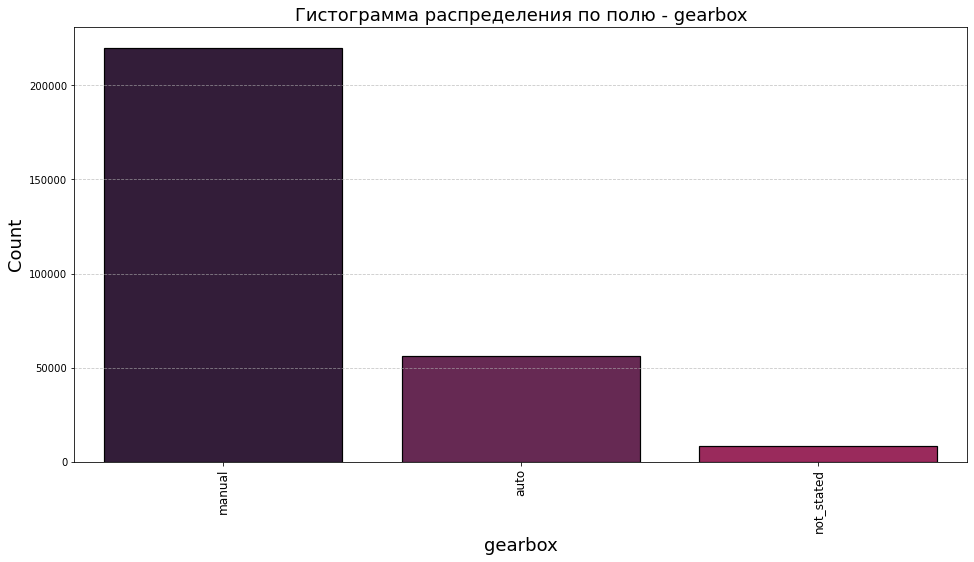

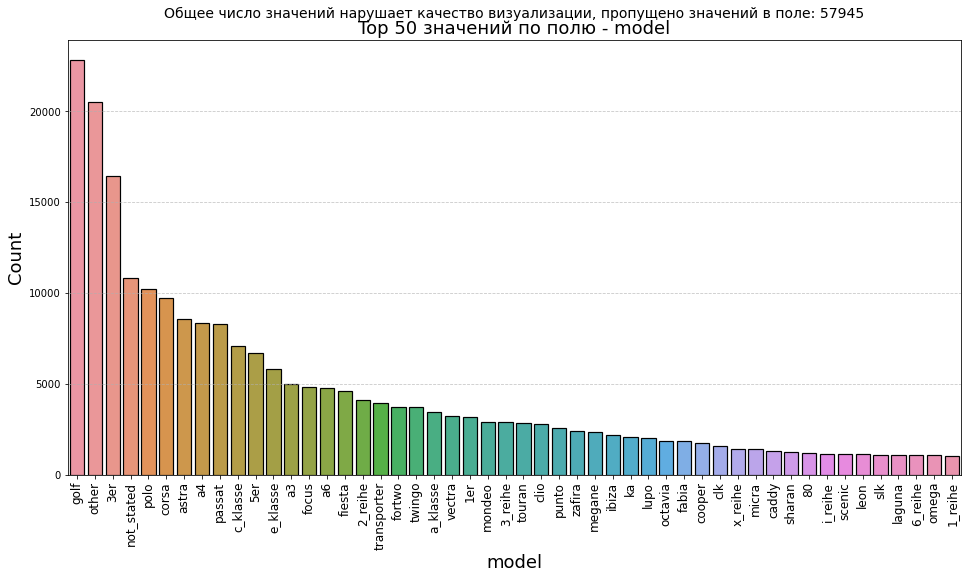

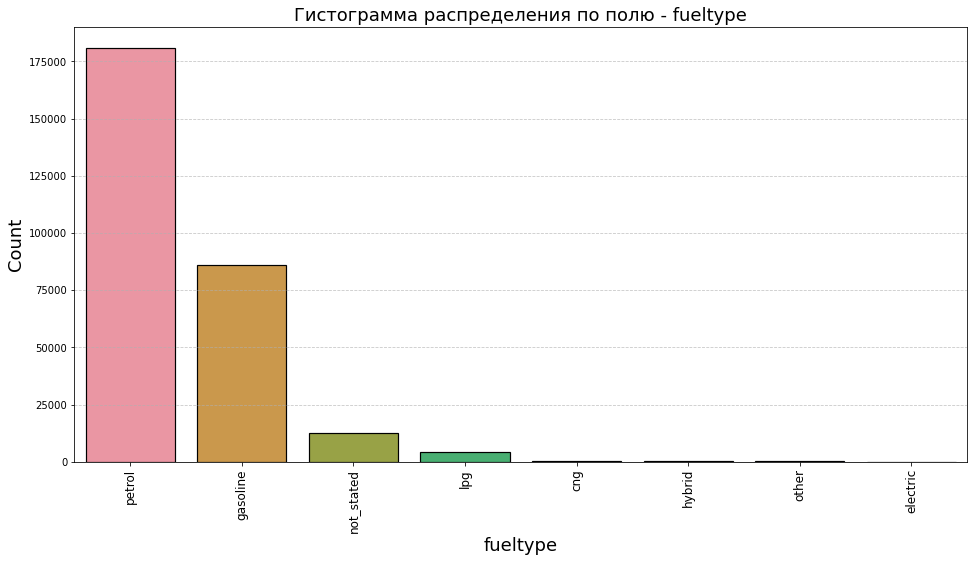

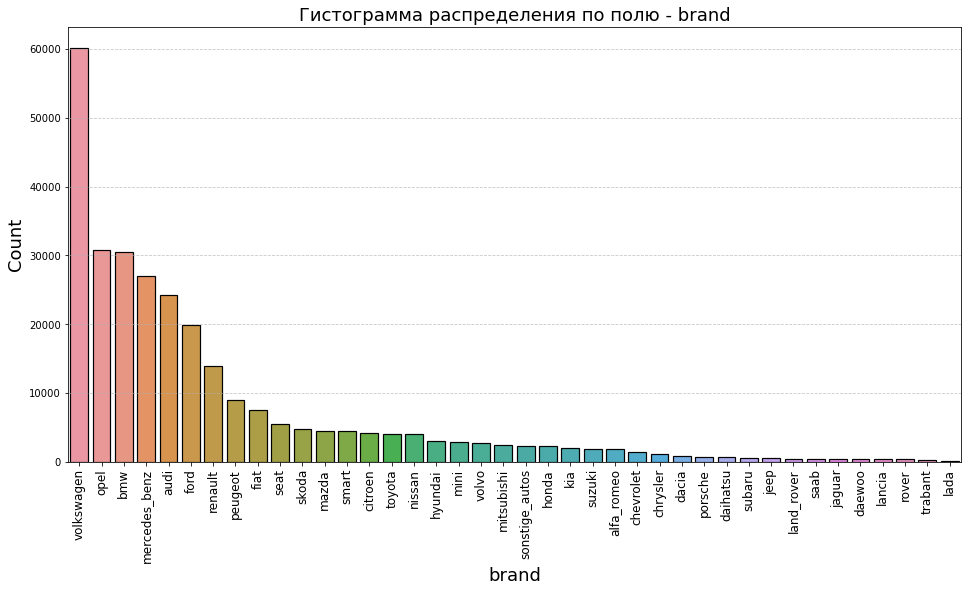

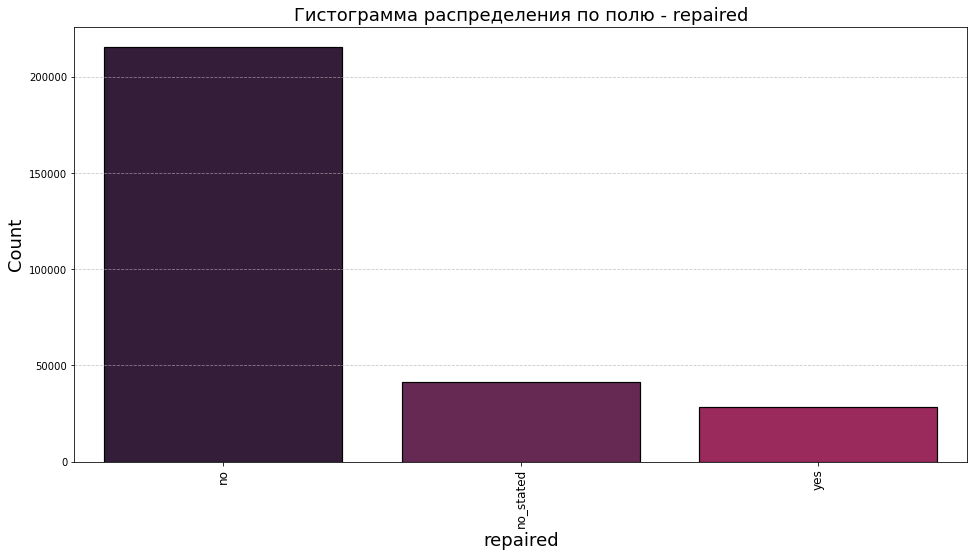

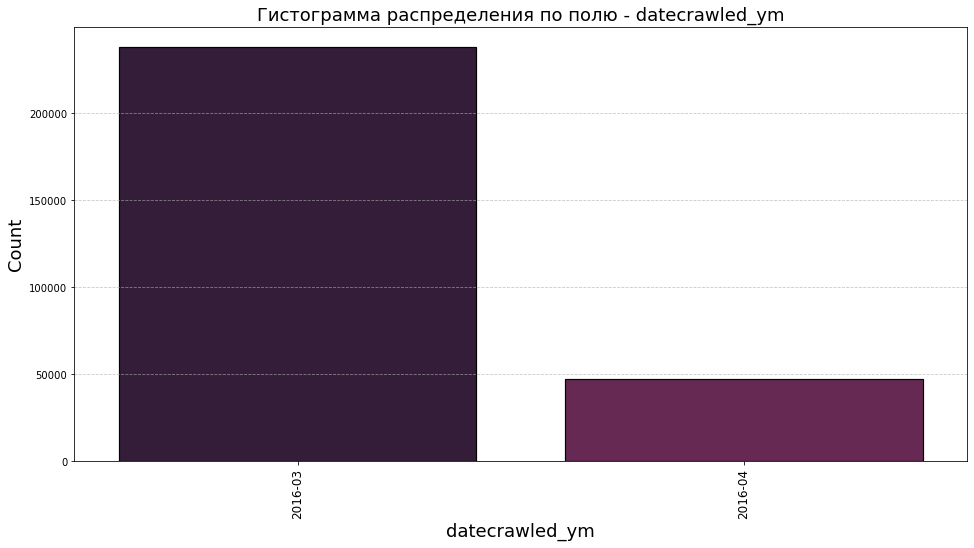

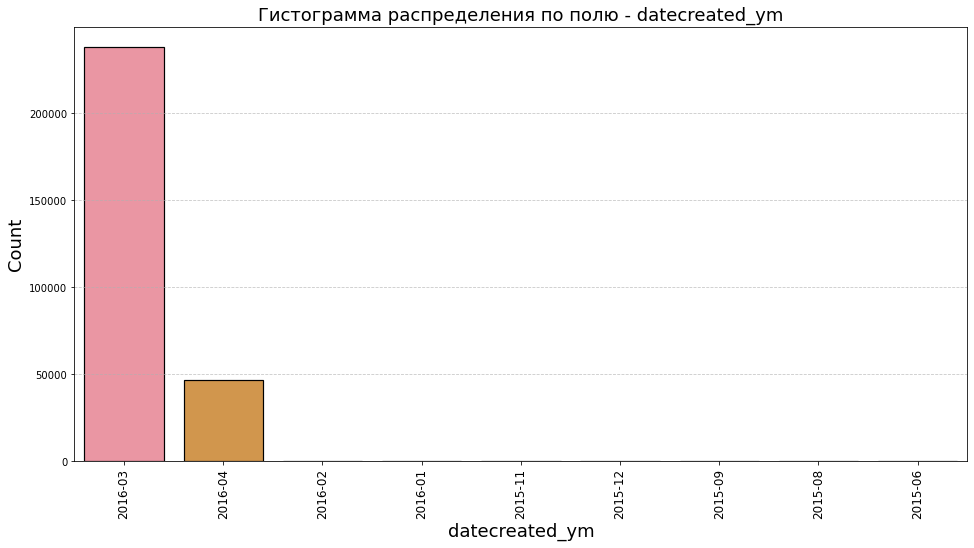

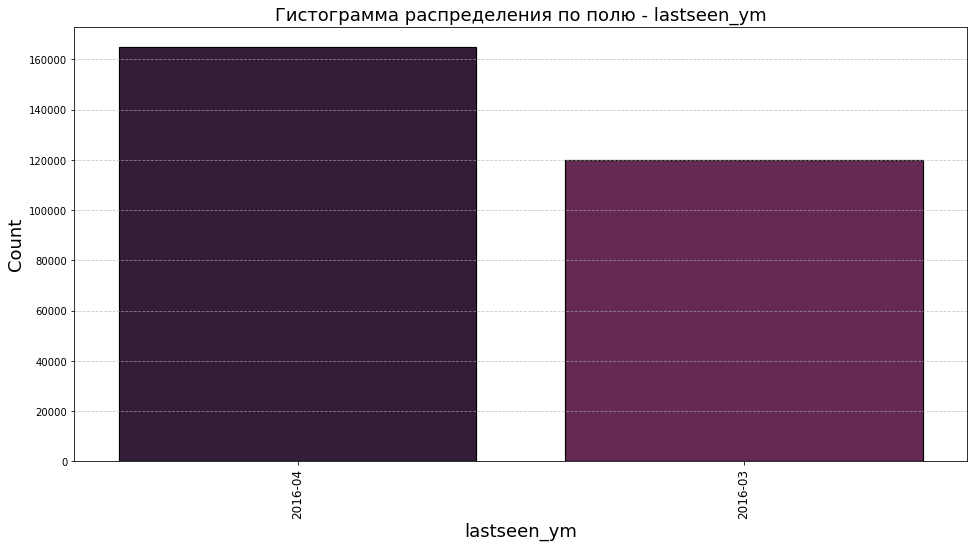

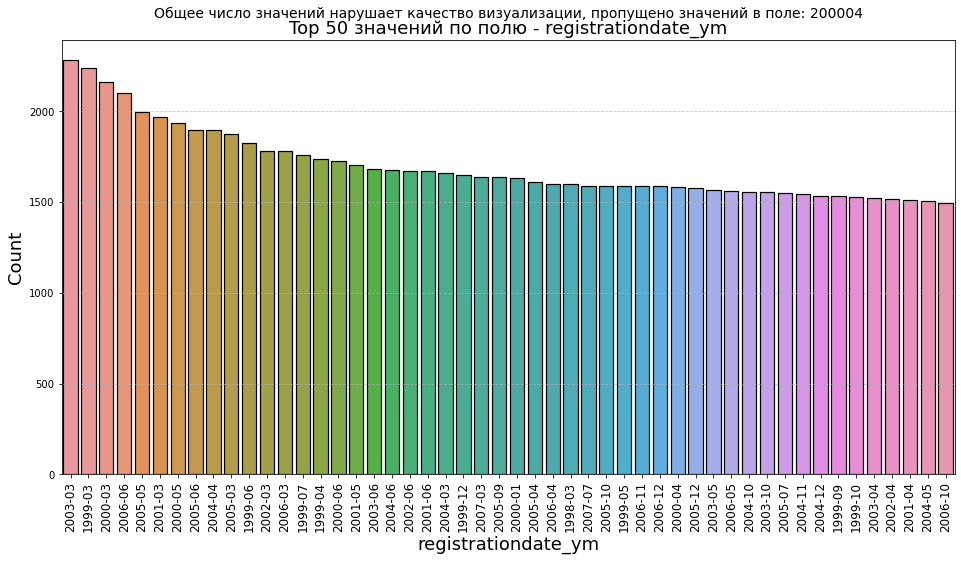

In [27]:
for x in df.select_dtypes(include=['object']).columns.to_list()[1:]:  count_plot(x)

## Промежуточный вывод 2

- `model` - имеет черезмерно большое количество сущностей внутри признака
-  `'datecrawled_ym'`и `'datecreated_ym'`,`'lastseen_ym'` можно удалить так как признаки содержит только 2 сущности и относится к дате,имеет смещение
- `'registrationdate_ym'`- можно удалить, так как признак содержит в себе более 12 уникальных значений и относится к дате,
-`kilometer` -километраж будем использовать в качестве показателя состояния оборудования 

In [28]:
df=df.drop(['datecrawled_ym', 'datecreated_ym','lastseen_ym','registrationdate_ym'],axis=1)

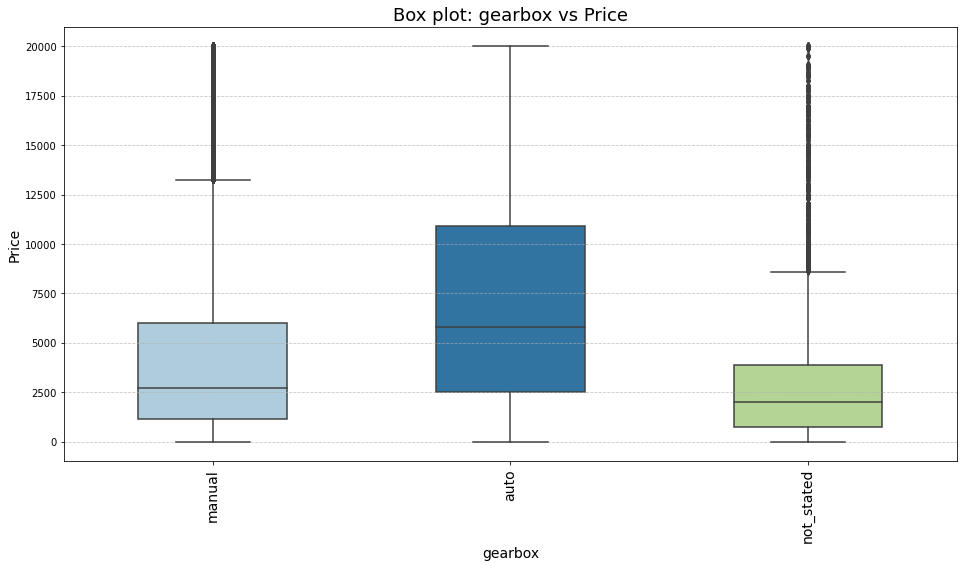

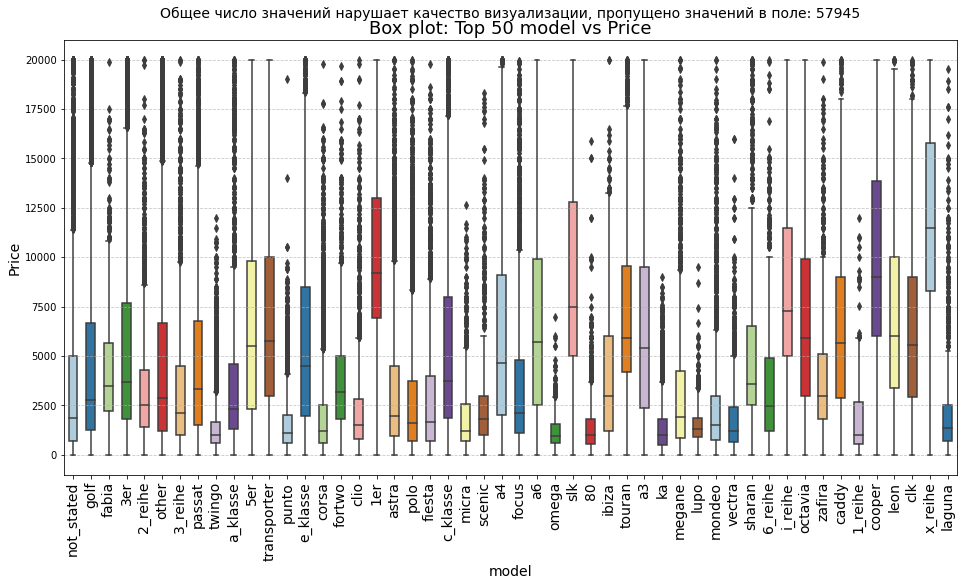

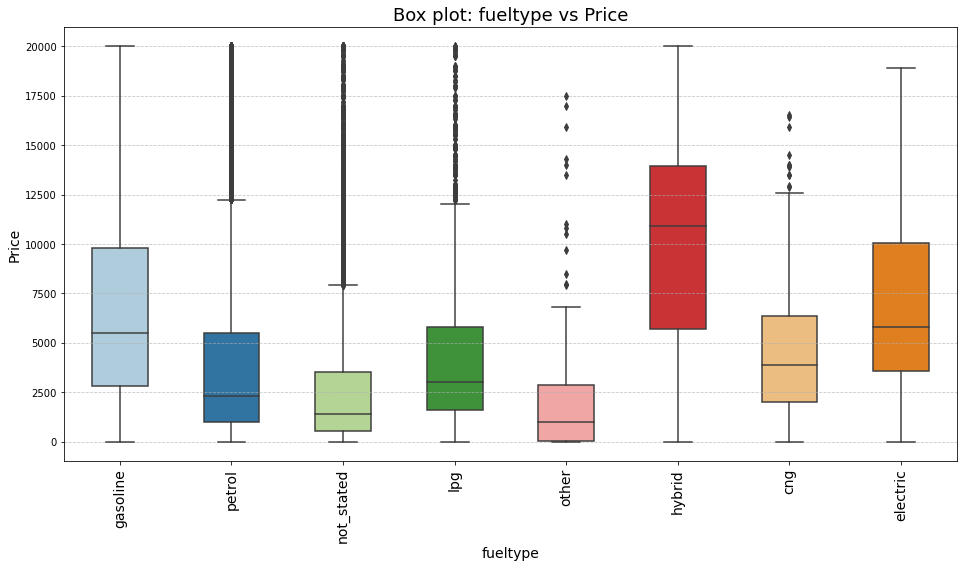

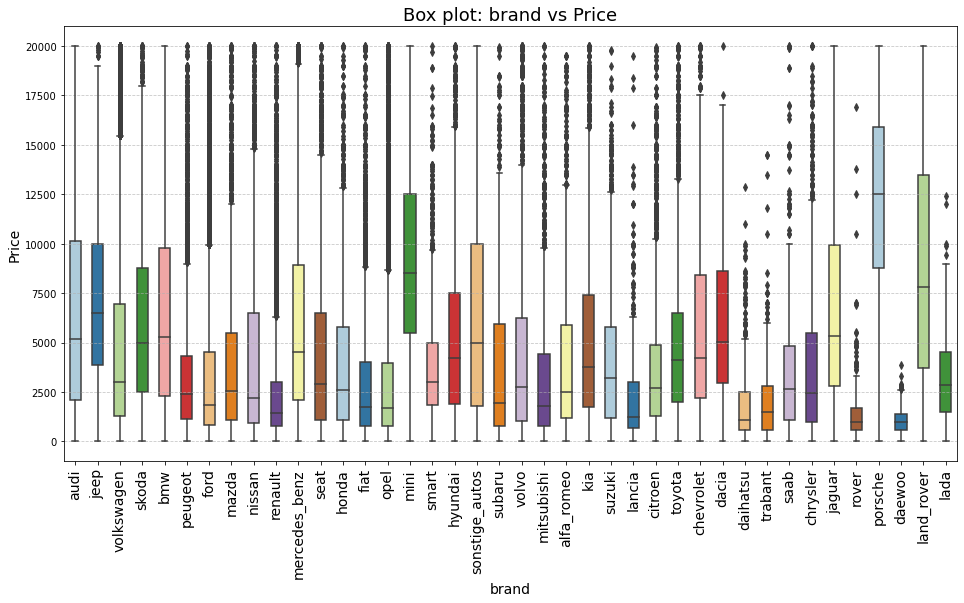

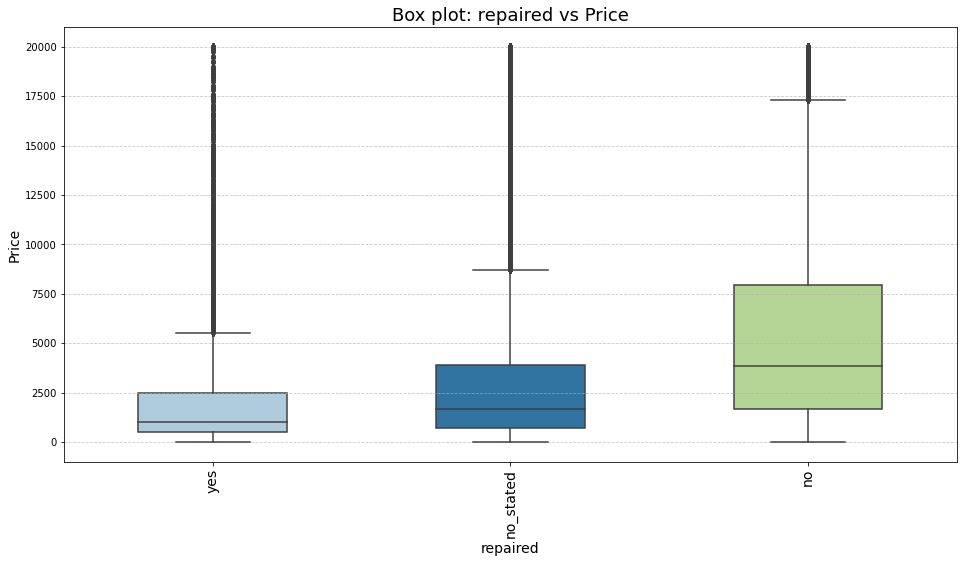

In [29]:
for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:  price_box_plot(x)

Рассмотрим гистограммы количественного распределения по показателям, имеющим численное определение

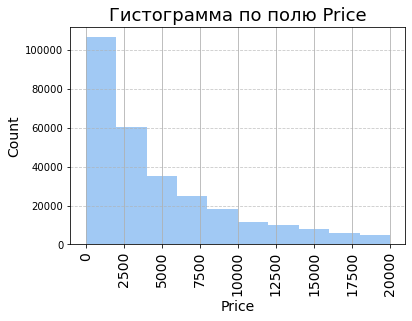

In [30]:
df.price.hist()
plt.title(f'Гистограмма по полю Price', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Данные массива имеют смещение по полю `price` в сторону диапазона 0- 2500, 
наиболее вероятная причина - наличие большого количества старого оборудования с высокой наработкой

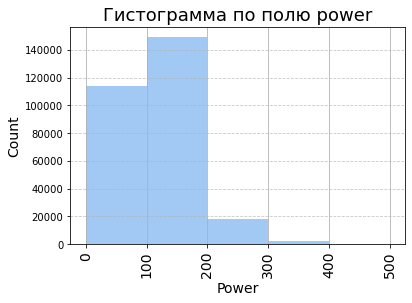

In [31]:
df.power.hist(bins=range(0,600,100))

plt.title(f'Гистограмма по полю power', fontsize=18)
plt.xlabel('Power', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [32]:
df[df.power==0]

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,postalcode
32,245,sedan,1994,not_stated,0,golf,150000,2,petrol,volkswagen,no,44145
37,1500,not_stated,2016,not_stated,0,kangoo,150000,1,gasoline,renault,no,46483
40,0,not_stated,1990,not_stated,0,corsa,150000,1,petrol,opel,no_stated,56412
55,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes,56759
70,800,small,1993,manual,0,polo,150000,3,petrol,volkswagen,no,8258
...,...,...,...,...,...,...,...,...,...,...,...,...
354335,390,small,1997,auto,0,corsa,100000,6,petrol,opel,yes,17509
354338,180,not_stated,1995,not_stated,0,not_stated,125000,3,petrol,opel,no_stated,41470
354346,2600,not_stated,2005,auto,0,c_klasse,150000,9,not_stated,mercedes_benz,no_stated,61169
354364,0,not_stated,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2694


В массиве оборудование преимущественно `power` [0, 200], присутсвуют машины с нулевой мощностью, которые подлежат удалению

In [33]:
df=df[df.power!=0]

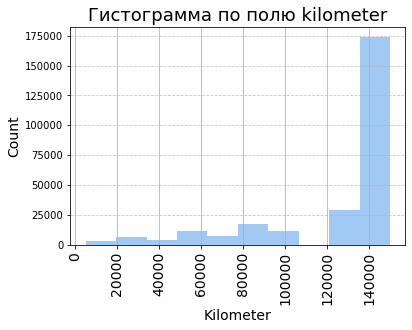

In [34]:
df.kilometer.hist()
plt.title(f'Гистограмма по полю kilometer', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Массив имеет смещение по полю `kilometer` в сторону  машин с высокой наработкой от 120000 до 140000, вероятная причина- низкая стоимость последних, также данное поле мы будем использовать как категорию

In [35]:
#закомментил, так как грузит код
# корр матрица phik 
#phik_corrs = df.phik_matrix(interval_cols=['power','price'])

In [36]:
#закомментил, так как грузит код
#plot_correlation_matrix(phik_corrs.values, 
#                        x_labels=phik_corrs.columns, 
#                        y_labels=phik_corrs.index, 
#                        vmin=0, vmax=1, color_map="Greens", 
#                        title=r"Корелляция параметров  $\phi_K$", 
#                        fontsize_factor=1.5, 
#                        figsize=(16, 8))
#plt.tight_layout()

`postalcode`- удаляем
`brand`-удаляем
`model`- удаляем
на таргет оказывают влияние 2 параметра это  `registrationyear` и `kilometer`, в свою очередь данные критерии созависимы, поэтому как индикатор состояния оставим пробег (`kilometer`) 

In [37]:
df=df.drop('postalcode',axis=1)

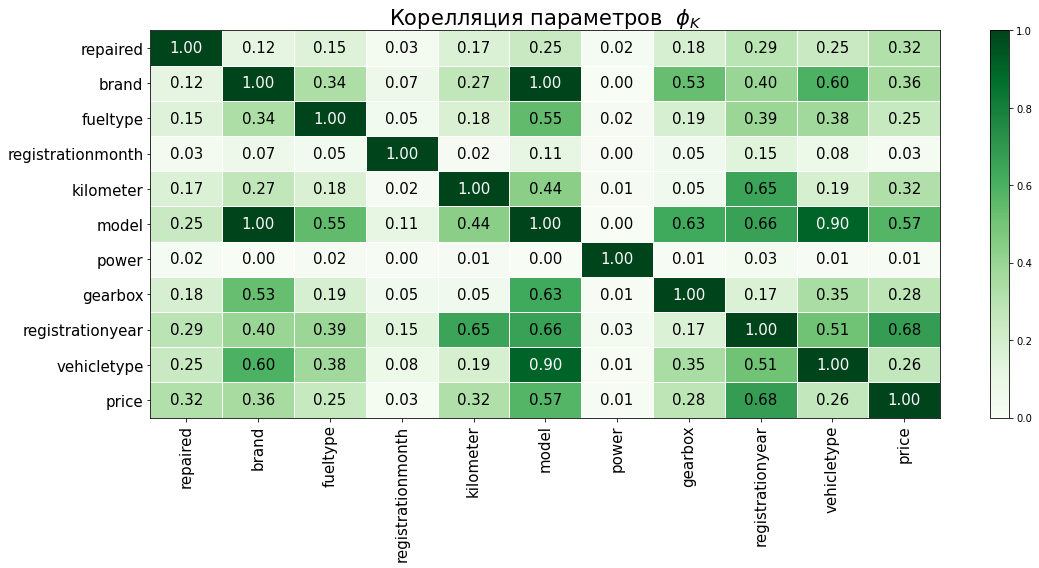

In [38]:
phik_corrs = df.phik_matrix(interval_cols=['power','price'])
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

In [39]:
df=df.drop('registrationyear',axis=1)
df=df.drop_duplicates()
df=df.drop('registrationmonth',axis=1)
df=df.drop_duplicates()

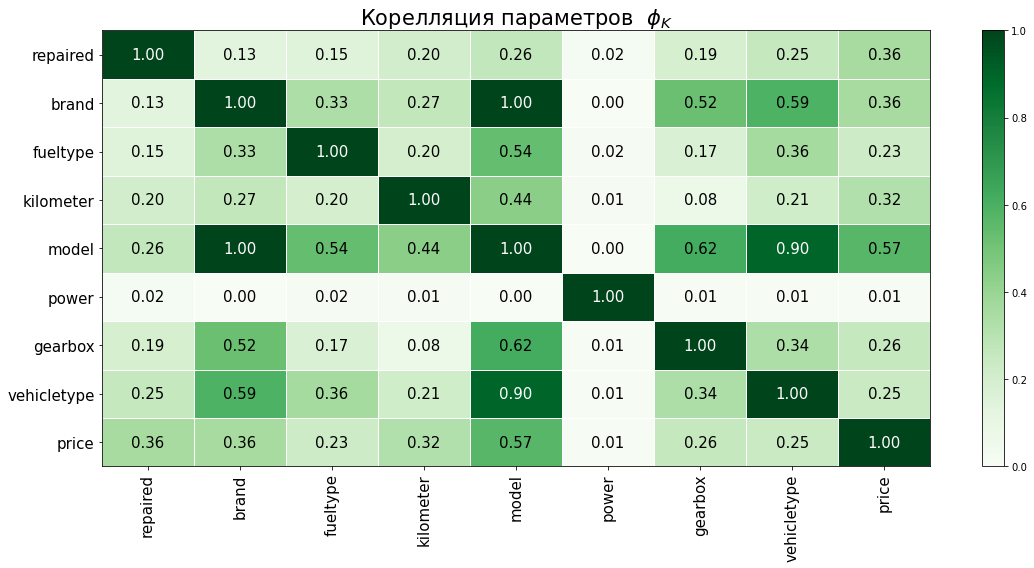

In [40]:
phik_corrs = df.phik_matrix(interval_cols=['power','price'])
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

удаляем `'vehicletype'`, оставляем `'price', model,'brand', 'gearbox', 'power', 'kilometer', 'fueltype',
       'repaired'`

In [41]:
#df=df.drop('model',axis=1)
#df=df.drop_duplicates()
#df=df.drop('brand',axis=1)
#df=df.drop_duplicates()

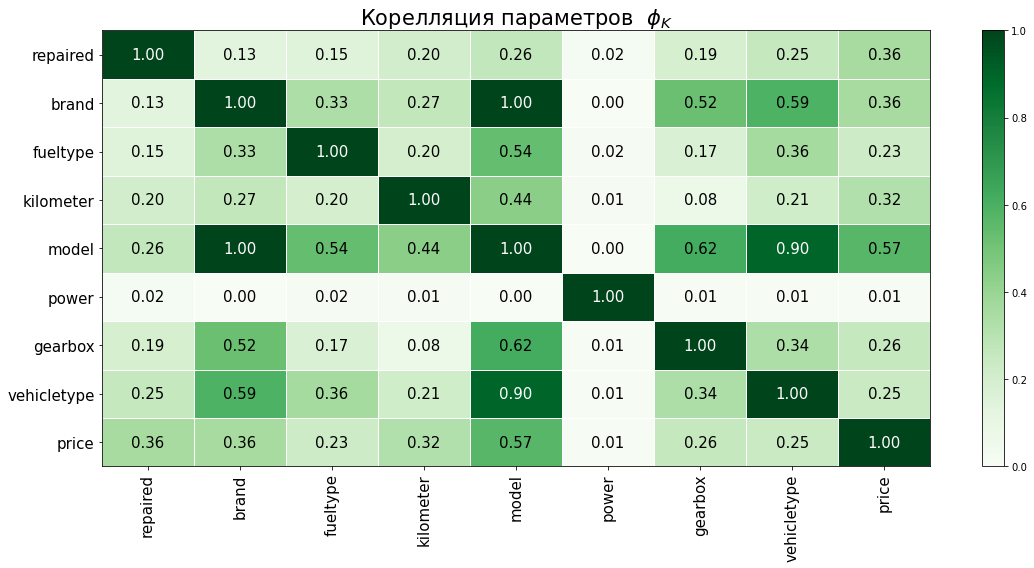

In [42]:
phik_corrs = df.phik_matrix(interval_cols=['power','price'])
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

In [43]:
df.columns

Index(['price', 'vehicletype', 'gearbox', 'power', 'model', 'kilometer',
       'fueltype', 'brand', 'repaired'],
      dtype='object')

In [44]:
def stripp(df):
    df['vehicletype']=df['vehicletype'].str.strip()
    df['gearbox']=df['gearbox'].str.strip()
    df['fueltype']=df['fueltype'].str.strip()
    
    
    return df

In [45]:
#Исключаем пробелы из категорий
df=stripp(df)

## Промежуточный вывод 2

В процессе анализа данных обнаружена созависимость между некоторыми критериями, например:

1. Наблюдается созависимость между полем `postalcode` и критериями `registration year`, `model`, `brand`. Это может указывать на связь между местоположением и характеристиками автомобиля.

2. Обнаружена слабая положительная взаимосвязь между полем `price` и критерием `repaired`, а также другими признаками. Эти наблюдения могут объяснять, почему удаление полей `registration year` и `registration month` может быть целесообразным для улучшения моделирования.


Для более точного моделирования и устранения мультиколлинеарности рекомендуется провести дополнительные преобразования данных и анализ взаимосвязей между признаками.

После проведенного анализа и обработки данных, было решено оставить следующие поля для дальнейшего моделирования:

1. `repaired` - состояние ремонта автомобиля.
2. `fueltype` - тип топлива.
3. `kilometr` - пробег автомобиля.
4. `power` - мощность двигателя.
5. `gearbox` - тип коробки передач.
6. `vehicletype` - тип автомобиля.
7. `price` - цена автомобиля.

Эти признаки были выбраны на основе их значимости и важности для построения модели. Дальнейший анализ и моделирование будет проводиться с использованием указанных признаков.

In [46]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               price          power      kilometer
count  218560.000000  218560.000000  218560.000000
mean     5264.596193     128.584576  124858.620059
std      4796.507095     202.240567   38628.485945
min         0.000000       1.000000    5000.000000
25%      1500.000000      84.000000  100000.000000
50%      3649.000000     116.000000  150000.000000
75%      7777.000000     150.000000  150000.000000
max     20000.000000   20000.000000  150000.000000
       vehicletype gearbox   model fueltype       brand repaired
count       218560  218560  218560   218560      218560   218560
unique           9       3     250        8          40        3
top          sedan  manual   other   petrol  volkswagen       no
freq         61839  166945   17840   136867       41432   165724


In [47]:
df_describe=df.describe()

In [48]:
df=df[(df['power']!=0)&(df['price']!=0)]

In [49]:
# Функция вывода пределов для сброса по методу IQR принимает на вход массив.describe() из числовых значений
# Рекомендация  использовать значения типа float | int 
# индекс- колонка с названием исходного столбца 
def iqr(stat_df_describe):
    stat_df_describe=pd.DataFrame(stat_df_describe.describe())
    stat_df_describe=stat_df_describe.reset_index(drop=True)
    #print(stat_df_describe)
    top_limit=[]
    bot_limit=[]
    columns_lst=[]
    for value in stat_df_describe.columns:
        limit_up=stat_df_describe[value][6]+1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        limit_low=stat_df_describe[value][4]-1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        top_limit.append(limit_up)
        bot_limit.append(limit_low)
        columns_lst.append(value)
        dictionary={'Columns':columns_lst, 'Top_limit':top_limit,'Bot_limit':bot_limit}
        a=pd.DataFrame(dictionary)
                
        
    return a

In [50]:
def filter_by_iqr(df, column, whisker_width=1.5):
    """Функция убирает выбросы из массива по названию колонки, также можно регулировать размер усов,
    убираются строки, значения которых меньше Q1-1.5IQR или больше, чем Q3+1.5IQR.
    Аргументы:
        df (`:obj:pd.DataFrame`): датафрейм
        column (str): название колонки
        whisker_width (float): коэффициент размера уса
    Возвращает:
        (`:obj:pd.DataFrame`): отфильтрованый по IQR датафрейм
    """
    # Высчитываем Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # применяем фильтрацию
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]   

In [51]:
#Фильтруем значения массива по IQR
df=filter_by_iqr(df,'price',whisker_width=1.5)
df=filter_by_iqr(df,'power',whisker_width=1.5)
df=filter_by_iqr(df,'kilometer',whisker_width=1.5)
df

,price,vehicletype,gearbox,power,model,kilometer,fueltype,brand,repaired
2,9800,suv,auto,163,grand,125000,gasoline,jeep,no_stated
3,1500,small,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,manual,109,2_reihe,150000,petrol,peugeot,no
...,...,...,...,...,...,...,...,...,...
354360,3999,wagon,manual,3,3er,150000,gasoline,bmw,no
354362,3200,sedan,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,manual,102,transporter,150000,gasoline,volkswagen,no


In [52]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               price          power      kilometer
count  198701.000000  198701.000000  198701.000000
mean     4769.894983     118.650993  128597.943644
std      4121.211381      45.423797   33630.130276
min         1.000000       1.000000   30000.000000
25%      1500.000000      82.000000  125000.000000
50%      3490.000000     115.000000  150000.000000
75%      6990.000000     150.000000  150000.000000
max     17200.000000     252.000000  150000.000000
       vehicletype gearbox   model fueltype       brand repaired
count       198701  198701  198701   198701      198701   198701
unique           9       3     249        8          40        3
top          sedan  manual   other   petrol  volkswagen       no
freq         55759  155595   15693   124204       38157   150559


In [53]:
df=df.drop_duplicates()
#Проверка отфильтрованного массива на дубликаты
df.duplicated().sum()

0

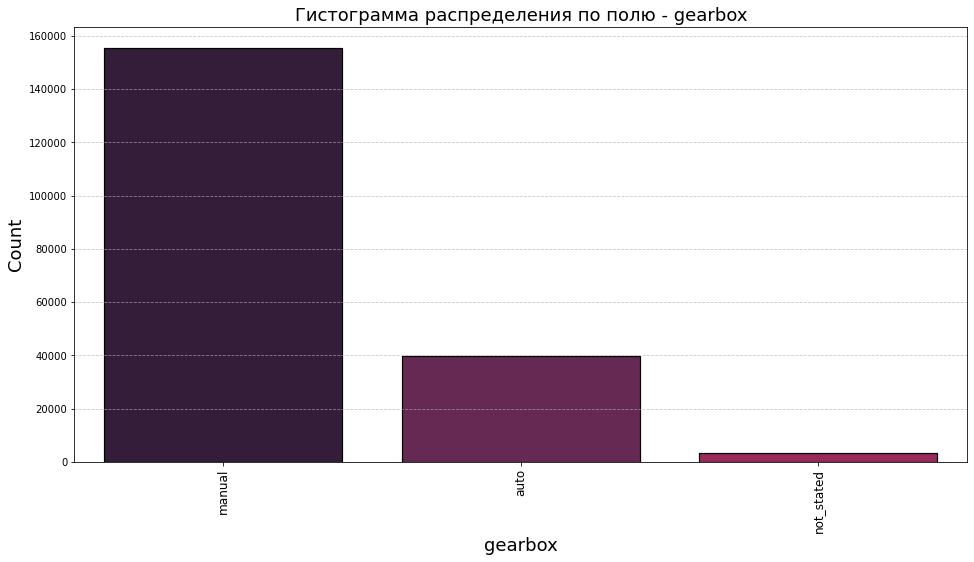

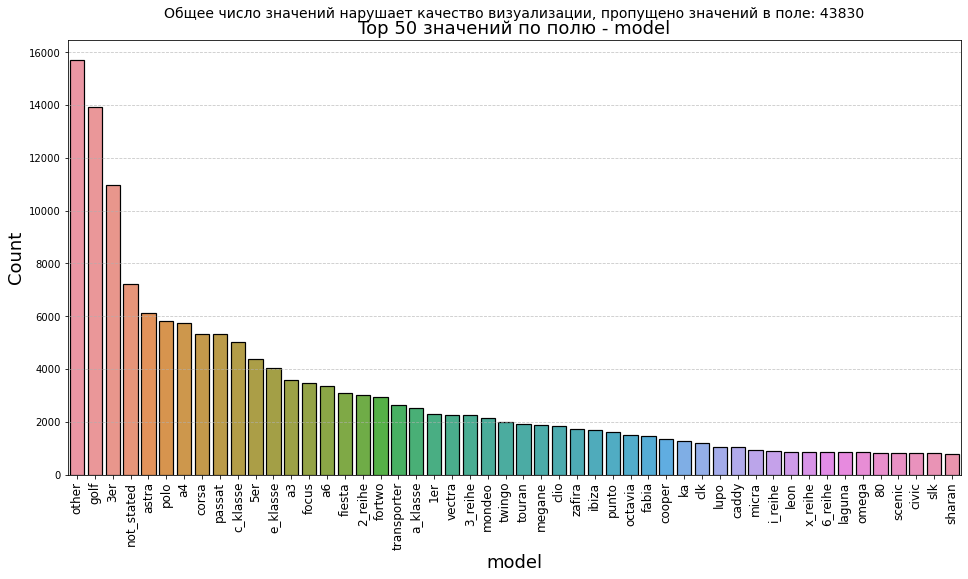

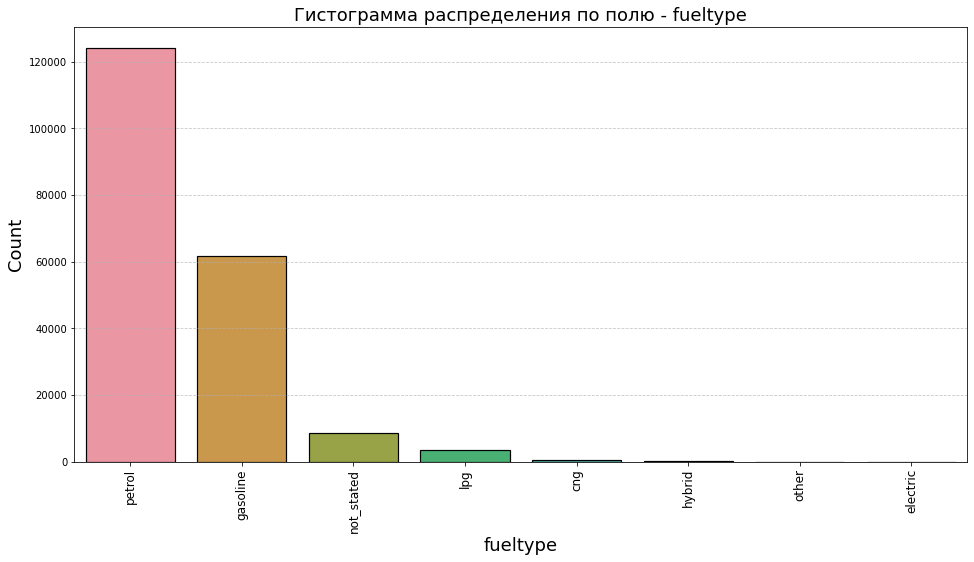

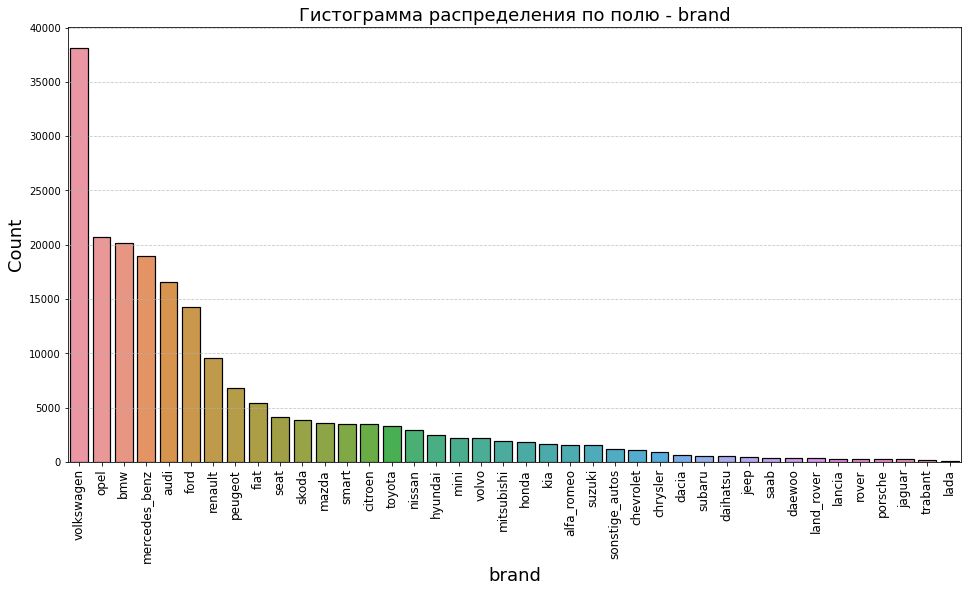

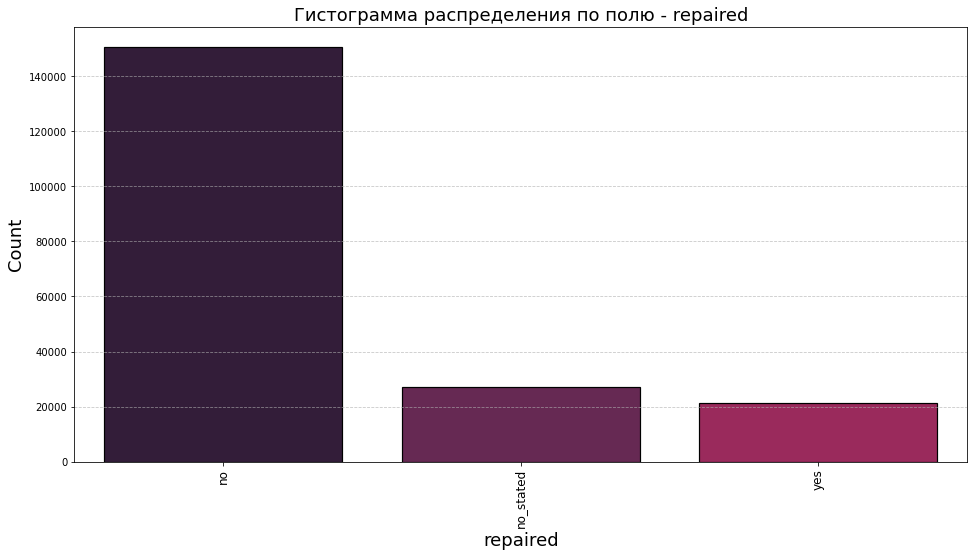

In [54]:
for x in df.select_dtypes(include=['object']).columns.to_list()[1:]:count_plot(x)

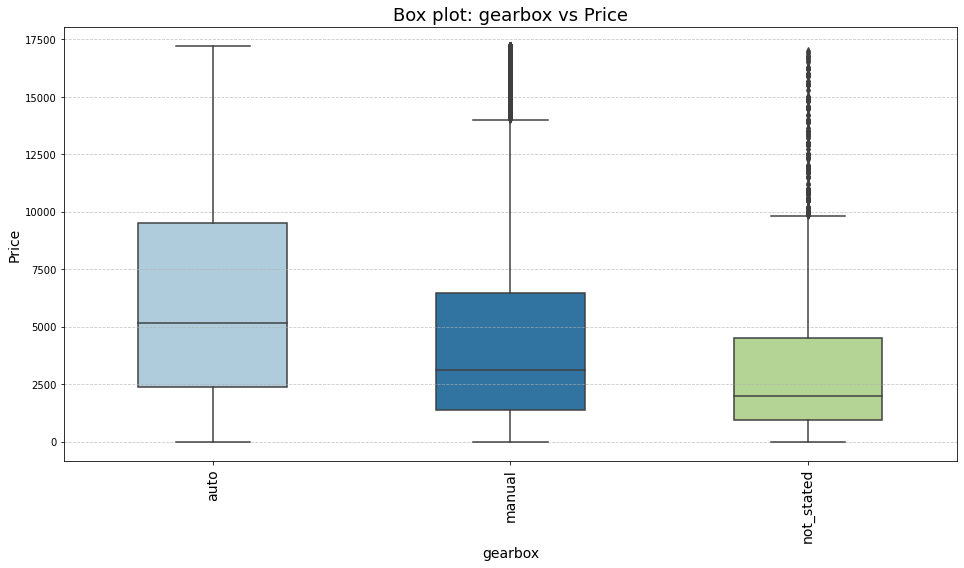

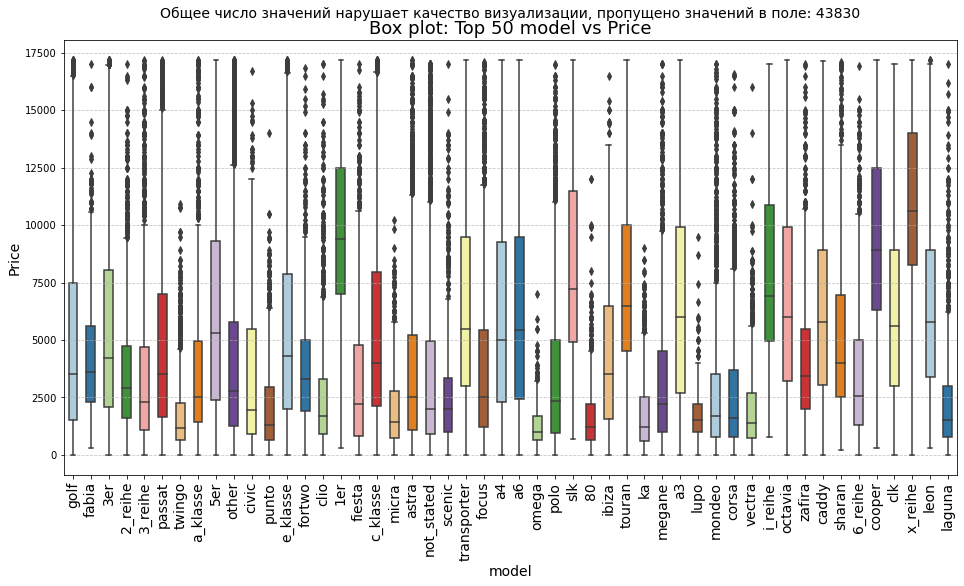

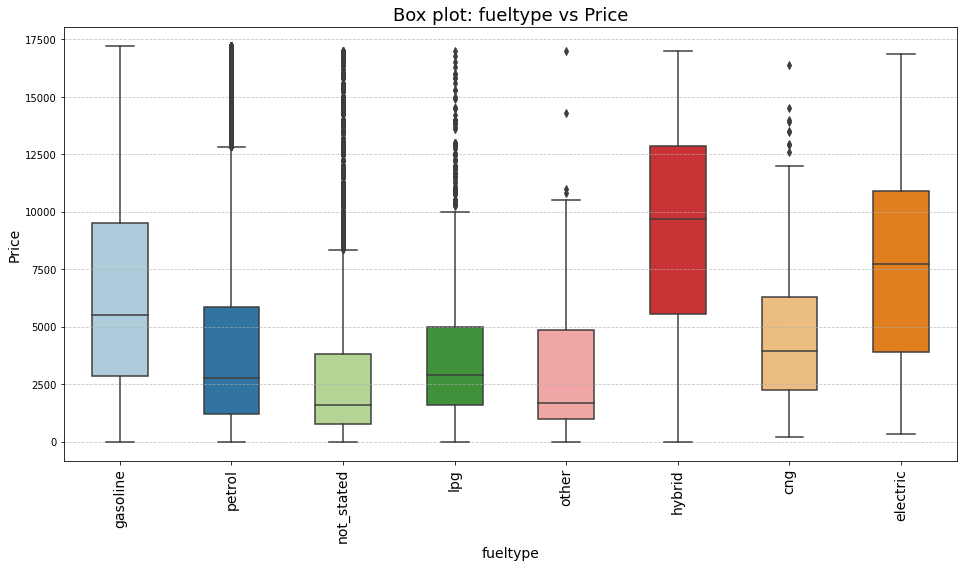

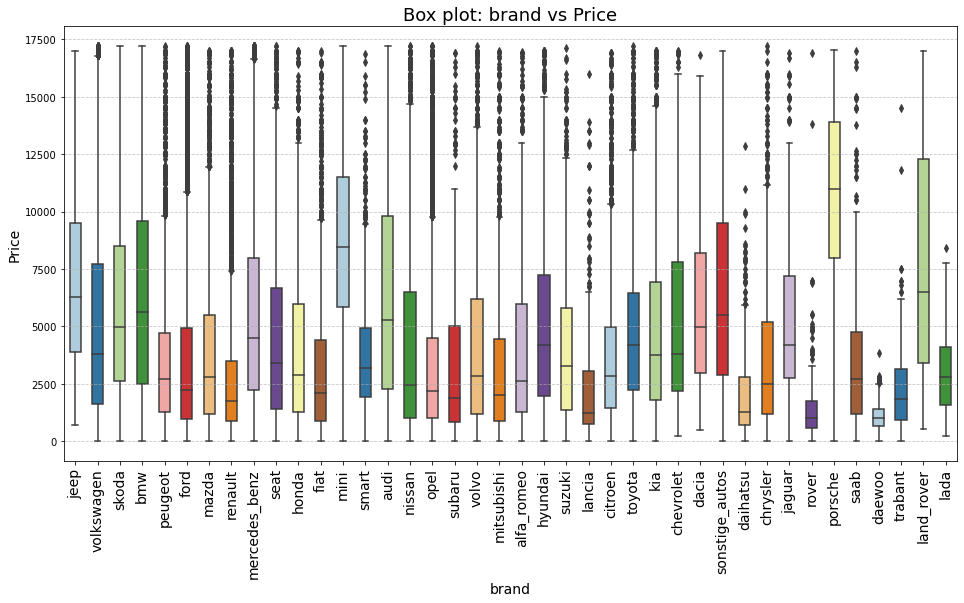

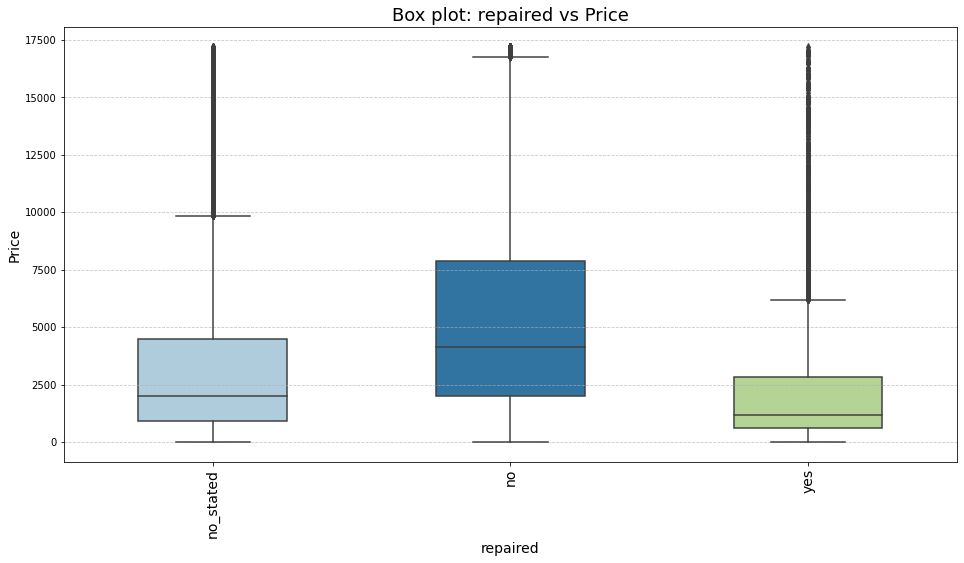

In [55]:
for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:price_box_plot(x)

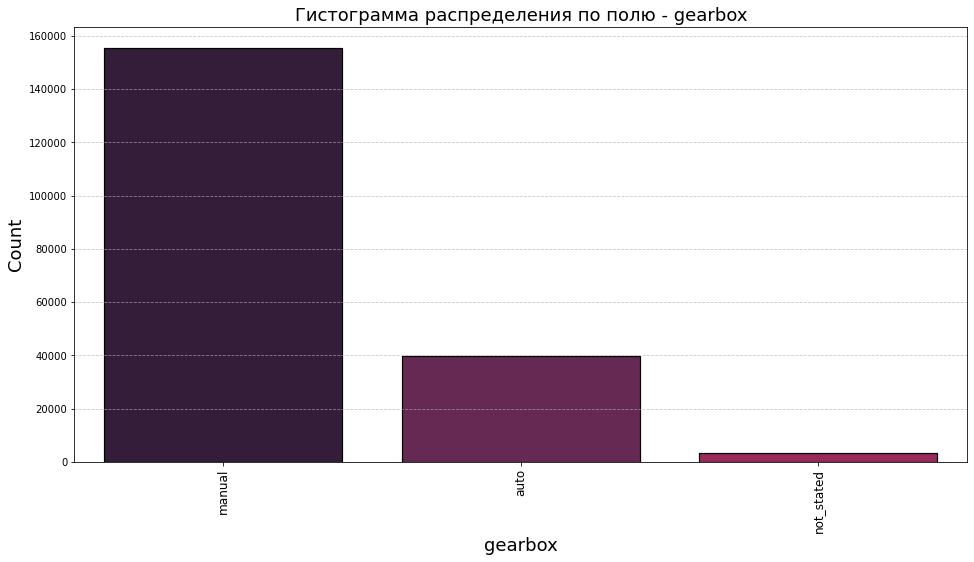

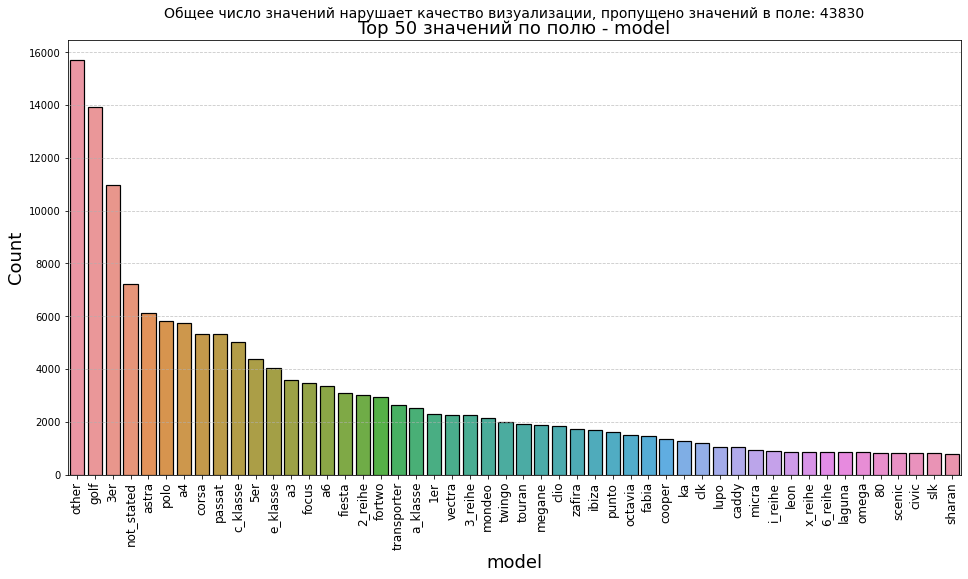

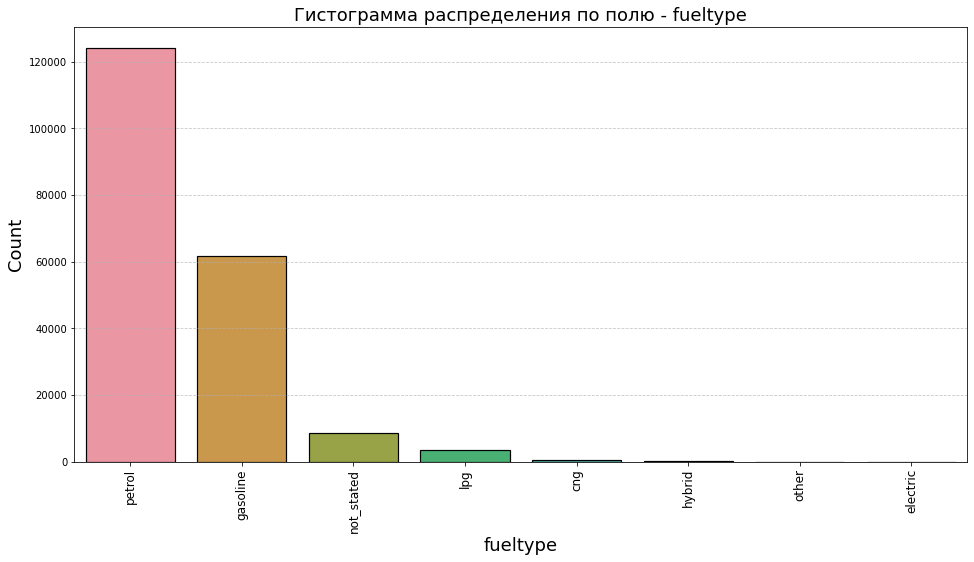

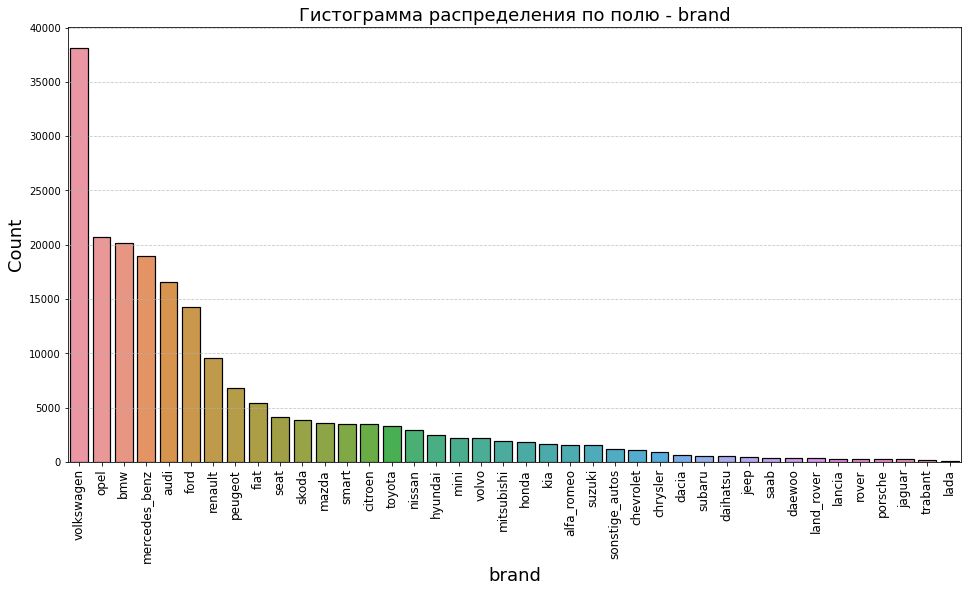

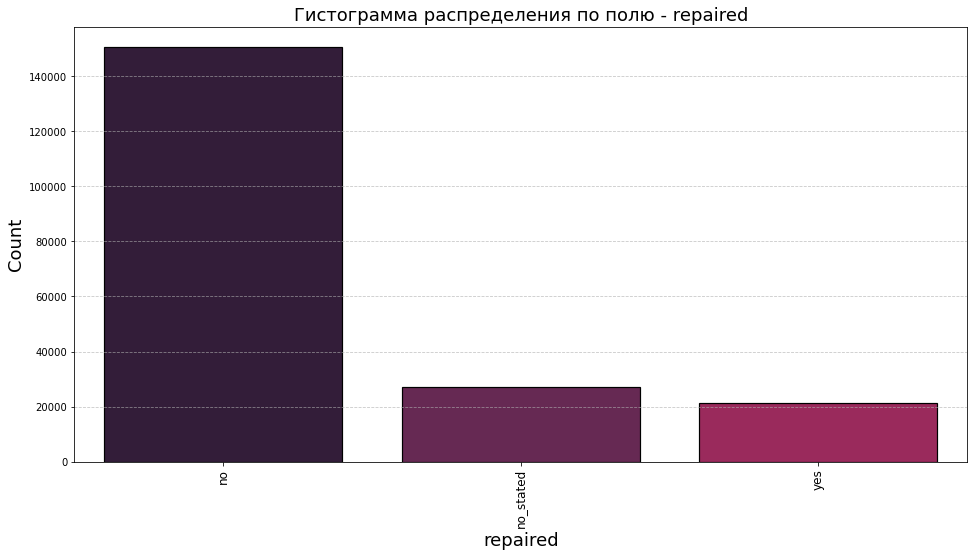

In [56]:
for x in df.select_dtypes(include=['object','bool']).columns.to_list()[1:]:count_plot(x)

Отчет по массиву

In [57]:
# profile = df.profile_report(title='df_filtered Profiling Report', progress_bar=False)
# profile

## Вывод по блоку

# В данных обнаружены следующие проблемы:

1. Поле `registrationyear` содержит ошибки, такие как неверные даты 9999 и 1000. Требуется коррекция данных в этом поле.

2. Обнаружено 10.7% строк с незаполненным месяцем регистрации. Поскольку эти данные могут быть важными, решено удалить строки с отсутствующим месяцем регистрации.

3. Выявлено смещение в категориальных признаках, таких как `gearbox`, `vehicletype`, `model`, `fueltype`, `brand`, `repaired`. Например, наблюдается доминирование значений, таких как `gearbox` - "manual", `vehicletype` - "sedan", `model` - "golf", `fueltype` - "petrol", `brand` - "volkswagen", `repaired` - "no". Это может повлиять на качество модели.

4. Наблюдается созависимость между некоторыми признаками, например, между `postalcode`, `registrationyear`, `model`, `brand`.

5. Обнаружена слабая положительная взаимосвязь между `price` и `repaired` и другими признаками. Это может быть одной из причин удаления полей `registrationyear` и `registrationmonth`.

6. В данных присутствуют выбросы, и категория `model` имеет слишком большое количество уникальных значений, что может повлиять на моделирование. Необходимо рассмотреть их и, возможно, произвести сокращение.

7. Основная часть автомобилей в наборе данных имеет механическую коробку передач, а также большинство автомобилей работает на бензине.

8. По брендам автомобилей не наблюдается явной зависимости от ценового диапазона.

# В результате проведенных анализов было решено оставить следующие поля: `repaired`, `fueltype`, `kilometr`, `power`, `gearbox`, `vehicletype`, `price`.


## Формирование X и y

In [58]:
X = df.drop(['price'], axis=1)
y = df['price']

In [59]:
X["kilometer"] = X["kilometer"].astype('object')

## Формирование X_train, X_valid, y_train, y_valid


In [60]:
#Делим массив на трейн и тест
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE)

In [61]:
# Определение списков категориальных и числовых признаков
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Создание преобразователей для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', CatBoostEncoder())
])

# Создание общего преобразователя для всех признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Определение списка моделей и их гиперпараметров
models = [
    ('Linear Regression', LinearRegression()),
    ('LGBM Regressor', LGBMRegressor(random_state=RANDOM_STATE)),
    ('CatBoost Regressor', CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)),
    ('Ridge Regression', Ridge(random_state=RANDOM_STATE)),
    ('Lasso Regression', Lasso(random_state=RANDOM_STATE)),
    ('DecisionTree Regressor', DecisionTreeRegressor(random_state=RANDOM_STATE)),  # Добавление DecisionTreeRegressor
    ('Dummy Model', DummyRegressor(strategy='mean'))  # Добавление Dummy модели
]

# Определение параметров
param_grid = [
    {'regression': [LinearRegression()]},
    {'regression': [LGBMRegressor(random_state=RANDOM_STATE)]},
    {'regression': [CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)]},
    {'regression': [Ridge(random_state=RANDOM_STATE)]},
    {'regression': [Lasso(random_state=RANDOM_STATE)]},
    {'regression': [DecisionTreeRegressor(random_state=RANDOM_STATE)]},  # Параметры для DecisionTreeRegressor
    {'regression': [DummyRegressor(strategy='mean')]}  # Параметры для Dummy модели
]

# Создание списка для хранения результатов
results_valid = []
results_test = []

for name, model in models:
    start_time = time.time()
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', model)
    ])
    
    pipeline.fit(X_train, y_train)    
    training_time = time.time() - start_time    
    start_time = time.time()    
    y_valid_pred = pipeline.predict(X_valid)
    prediction_time = time.time() - start_time
    
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    rmse_valid = sqrt(mse_valid)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    
    results_valid.append([name, mse_valid, rmse_valid, mae_valid, r2_valid, training_time, prediction_time])
    
    # Тестирование на тестовых данных только для LGBMRegressor и CatBoostRegressor
    if name in ['LGBM Regressor', 'CatBoost Regressor']:
        start_time = time.time()
        y_test_pred = pipeline.predict(X_test)
        prediction_time = time.time() - start_time

        mse_test = mean_squared_error(y_test, y_test_pred)
        rmse_test = sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)

        results_test.append([name, mse_test, rmse_test, mae_test, r2_test, training_time, prediction_time])

# Создание DataFrame с результатами на valid
results_df_valid = pd.DataFrame(results_valid, columns=['Model', 'MSE_Valid', 'RMSE_Valid', 'MAE_Valid', 'R2_Valid', 'Training Time', 'Prediction Time'])

# Создание DataFrame с результатами на test только для LGBMRegressor и CatBoostRegressor
results_df_test = pd.DataFrame(results_test, columns=['Model', 'MSE_Test', 'RMSE_Test', 'MAE_Test', 'R2_Test', 'Training Time', 'Prediction Time'])




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


In [62]:
# Отображение результатов на valid
print('Результаты на valid:')
results_df_valid.sort_values(by=['RMSE_Valid', 'Training Time', 'Prediction Time'], ascending=True)



Результаты на valid:


,Model,MSE_Valid,RMSE_Valid,MAE_Valid,R2_Valid,Training Time,Prediction Time
2,CatBoost Regressor,4.487848e+06,2118.454175,1499.532996,0.736844,14.518537,0.069766
1,LGBM Regressor,4.800143e+06,2190.922761,1571.040977,0.718532,1.611621,0.145515
4,Lasso Regression,6.986832e+06,2643.261646,2015.119576,0.590311,1.058916,0.108517
3,Ridge Regression,6.986904e+06,2643.275279,2015.167990,0.590306,1.010489,0.053824
0,Linear Regression,6.986905e+06,2643.275494,2015.168712,0.590306,0.890271,0.077742
5,DecisionTree Regressor,8.506536e+06,2916.596602,1966.469281,0.501199,8.568259,0.080194
6,Dummy Model,1.705408e+07,4129.659000,3327.123745,-0.000007,0.818038,0.057989


## Интерпритация тестирования моделей на массиве X_valid,y_valid, выбор лучших моделей
Из результатов моделей регрессии для валидационных данных видно следующее:

1. CatBoost Regressor демонстрирует наилучшие показатели среди всех моделей. Его RMSE составляет примерно 2118.45, что близко к требуемой величине (меньше 2500). Это также подтверждается высоким значением R2 (0.7368), что указывает на хорошее качество модели.

2. LGBM Regressor также показывает хорошие результаты со значением RMSE около 2190.92 и R2 примерно 0.7185. Эта модель хорошо справляется с задачей регрессии.

3. Ridge и Lasso регрессии, а также линейная регрессия (Linear Regression), демонстрируют сопоставимые результаты с RMSE около 2643. Эти модели имеют ниже значение R2 (примерно 0.5903), что может указывать на то, что они менее точны по сравнению с CatBoost и LGBM Regressor.

4. DecisionTree Regressor имеет RMSE около 2916.60 и R2 приближенное к 0.5012. Это худший результат среди всех моделей, что может указывать на переобучение модели.

5. Dummy Model имеет самые плохие результаты с RMSE около 4129.66 и отрицательным значением R2. Эта модель просто предсказывает среднее значение целевой переменной и явно не подходит для данной задачи.

Таким образом, наилучшей моделью среди рассмотренных является CatBoost Regressor, за ней следует LGBM Regressor. Остальные модели имеют менее точные результаты или не соответствуют требованиям.



In [63]:
# Отображение результатов на test только для LGBMRegressor и CatBoostRegressor
print('\nРезультаты на test для LGBMRegressor и CatBoostRegressor:')
results_df_test.sort_values(by=['RMSE_Test', 'Training Time', 'Prediction Time'], ascending=True)


Результаты на test для LGBMRegressor и CatBoostRegressor:


,Model,MSE_Test,RMSE_Test,MAE_Test,R2_Test,Training Time,Prediction Time
1,CatBoost Regressor,4.595758e+06,2143.771865,1508.048665,0.732406,14.518537,0.071757
0,LGBM Regressor,4.888104e+06,2210.905699,1575.573513,0.715383,1.611621,0.121592


Если Исходить из времени предсказания- обучения, то  оптимальным вариантом будет LGBM Regressor

In [64]:
# Определение списка моделей и их гиперпараметров (только CatBoost Regressor и LGBM Regressor)
models = [
    ('LGBM Regressor', LGBMRegressor(random_state=RANDOM_STATE)),
    ('CatBoost Regressor', CatBoostRegressor(random_state=RANDOM_STATE, verbose=0,))
]

# Создание списка для хранения результатов
results = []
best_params_list = []

for name, model in models:
    start_time = time.time()
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', model)
    ])
    
    # Оптимизация гиперпараметров с помощью Optuna
    def objective(trial):
        if name == 'LGBM Regressor':
            # Определение гиперпараметров для LGBM Regressor
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                'max_depth': trial.suggest_int('max_depth', 5, 12),
                'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
                'random_state': RANDOM_STATE
            }
            model = LGBMRegressor(**params)
        elif name == 'CatBoost Regressor':
            # Определение гиперпараметров для CatBoost Regressor
            params = {
                'iterations': trial.suggest_int('iterations', 100, 1000),
                'depth': trial.suggest_int('depth', 5, 12),
                'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10),
                'random_state': RANDOM_STATE,
                'verbose': 0
            }
            model = CatBoostRegressor(**params)
        
        pipeline.named_steps['regression'] = model
        pipeline.fit(X_train, y_train)
        
        y_valid_pred = pipeline.predict(X_valid)
        mse_valid = mean_squared_error(y_valid, y_valid_pred)
        
        return mse_valid
    #задаем для семплера оптуны random_state
    study = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))
    
    study.optimize(objective, n_trials=10)
    best_params = study.best_params
    best_params_list.append(best_params)
    
    pipeline.named_steps['regression'] = model
    pipeline.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    start_time = time.time()
    y_valid_pred = pipeline.predict(X_valid)
    prediction_time = time.time() - start_time
    
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    rmse_valid = sqrt(mse_valid)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    
    results.append([name, mse_valid, rmse_valid, mae_valid, r2_valid, training_time, prediction_time])

# Вывод лучших гиперпараметров для каждой модели
for model_name, best_params in zip([name for name, _ in models], best_params_list):
    print(f"Лучшие гиперпараметры для модели {model_name}: {best_params}")

    # Создание DataFrame для хранения лучших гиперпараметров
best_params_df = pd.DataFrame(best_params_list, index=[name for name, _ in models])

# Отображение таблицы с лучшими гиперпараметрами
print("Лучшие гиперпараметры для каждой модели:")
print(best_params_df)

[I 2024-02-02 08:09:13,013] A new study created in memory with name: no-name-155dab7a-bf9c-4776-b82e-2bb7d3d605f2


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:14,467] Trial 0 finished with value: 4800142.543692364 and parameters: {'n_estimators': 937, 'max_depth': 7, 'learning_rate': 0.01920796235603235}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:16,160] Trial 1 finished with value: 4800142.543692364 and parameters: {'n_estimators': 284, 'max_depth': 9, 'learning_rate': 0.05995892559494591}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:17,736] Trial 2 finished with value: 4800142.543692364 and parameters: {'n_estimators': 969, 'max_depth': 10, 'learning_rate': 0.07514175711585727}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:19,285] Trial 3 finished with value: 4800142.543692364 and parameters: {'n_estimators': 688, 'max_depth': 10, 'learning_rate': 0.09616936687120932}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:20,763] Trial 4 finished with value: 4800142.543692364 and parameters: {'n_estimators': 107, 'max_depth': 5, 'learning_rate': 0.030571667663168774}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:22,507] Trial 5 finished with value: 4800142.543692364 and parameters: {'n_estimators': 691, 'max_depth': 11, 'learning_rate': 0.08734541545870403}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:24,002] Trial 6 finished with value: 4800142.543692364 and parameters: {'n_estimators': 969, 'max_depth': 10, 'learning_rate': 0.06460505746168829}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:25,520] Trial 7 finished with value: 4800142.543692364 and parameters: {'n_estimators': 746, 'max_depth': 8, 'learning_rate': 0.033232883076398406}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:26,933] Trial 8 finished with value: 4800142.543692364 and parameters: {'n_estimators': 496, 'max_depth': 10, 'learning_rate': 0.09940744400409623}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:28,643] Trial 9 finished with value: 4800142.543692364 and parameters: {'n_estimators': 709, 'max_depth': 11, 'learning_rate': 0.017920511521451007}. Best is trial 0 with value: 4800142.543692364.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618


[I 2024-02-02 08:09:30,399] A new study created in memory with name: no-name-57078174-1831-4ef8-9ed0-f9f864e1d445
[I 2024-02-02 08:09:45,819] Trial 0 finished with value: 4487848.093309819 and parameters: {'iterations': 937, 'depth': 7, 'learning_rate': 0.01920796235603235, 'l2_leaf_reg': 2.1251467576750933}. Best is trial 0 with value: 4487848.093309819.
[I 2024-02-02 08:10:00,365] Trial 1 finished with value: 4487848.093309819 and parameters: {'iterations': 611, 'depth': 9, 'learning_rate': 0.09648693745382654, 'l2_leaf_reg': 6.566453259028552}. Best is trial 0 with value: 4487848.093309819.
[I 2024-02-02 08:10:14,224] Trial 2 finished with value: 4487848.093309819 and parameters: {'iterations': 774, 'depth': 10, 'learning_rate': 0.07502376611785612, 'l2_leaf_reg': 9.616936687120932}. Best is trial 0 with value: 4487848.093309819.
[I 2024-02-02 08:10:28,254] Trial 3 finished with value: 4487848.093309819 and parameters: {'iterations': 107, 'depth': 5, 'learning_rate': 0.0305716676631

Лучшие гиперпараметры для модели LGBM Regressor: {'n_estimators': 937, 'max_depth': 7, 'learning_rate': 0.01920796235603235}
Лучшие гиперпараметры для модели CatBoost Regressor: {'iterations': 937, 'depth': 7, 'learning_rate': 0.01920796235603235, 'l2_leaf_reg': 2.1251467576750933}
Лучшие гиперпараметры для каждой модели:
                    n_estimators  max_depth  learning_rate  iterations  depth  \
LGBM Regressor             937.0        7.0       0.019208         NaN    NaN   
CatBoost Regressor           NaN        NaN       0.019208       937.0    7.0   

                    l2_leaf_reg  
LGBM Regressor              NaN  
CatBoost Regressor     2.125147  


Сверка для воспроизводимости

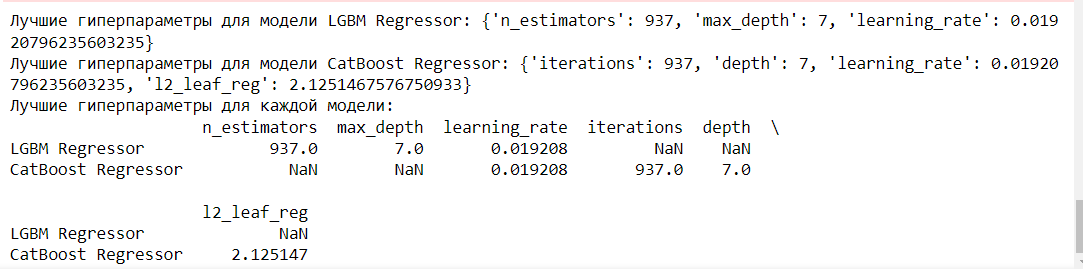

In [65]:
# Создание списка для хранения результатов на тестовых данных
test_results = []

best_models = {
    'LGBM Regressor': LGBMRegressor(n_estimators=937, max_depth=7, learning_rate=0.019208, random_state=RANDOM_STATE),
    'CatBoost Regressor': CatBoostRegressor(iterations=795, depth=7, learning_rate=0.019208, l2_leaf_reg=2.125147,
                                            random_state=RANDOM_STATE, verbose=0)
}

for model_name, best_model in best_models.items():
    # Создание и обучение модели с лучшими гиперпараметрами
    best_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', best_model)
    ])
    
    start_time = time.time()
    best_pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = best_pipeline.predict(X_test)
    prediction_time = time.time() - start_time
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    test_results.append([model_name, mse_test, rmse_test, mae_test, r2_test, training_time, prediction_time])

# Создание DataFrame с результатами на тестовых данных
test_results_df = pd.DataFrame(test_results, columns=['Model', 'MSE_Test', 'RMSE_Test', 'MAE_Test', 'R2_Test', 'Training Time', 'Prediction Time'])




[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2028
[LightGBM] [Info] Number of data points in the train set: 149025, number of used features: 8
[LightGBM] [Info] Start training from score 4764.238618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [66]:
# Отображение таблицы с лучшими гиперпараметрами
print("Лучшие гиперпараметры для каждой модели:")
best_params_df

Лучшие гиперпараметры для каждой модели:


,n_estimators,max_depth,learning_rate,iterations,depth,l2_leaf_reg
LGBM Regressor,937.0,7.0,0.019208,NaN,NaN,NaN
CatBoost Regressor,NaN,NaN,0.019208,937.0,7.0,2.125147


In [67]:
# Отображение результатов на тестовых данных моделей с лучшими гипперпараметрами 
print("Результаты на тестовых данных:")
test_results_df

Результаты на тестовых данных:


,Model,MSE_Test,RMSE_Test,MAE_Test,R2_Test,Training Time,Prediction Time
0,LGBM Regressor,4.723546e+06,2173.372117,1538.659396,0.724965,4.314772,0.487355
1,CatBoost Regressor,5.149264e+06,2269.198988,1625.577047,0.700177,13.979921,0.076731


## Итоговый вывод:

В ходе анализа данных были выявлены следующие проблемы и решения:

1. Ошибки, пропуски и дубликаты данных: Были обнаружены ошибки в поле `registrationyear`, включая неверные даты. Было принято решение скорректировать данные в этом поле. Также были удалены строки с отсутствующим месяцем регистрации.

2. Смещение в категориальных признаках: Было обнаружено смещение в значениях некоторых категориальных признаков, таких как `gearbox`, `vehicletype`, `model`, `fueltype`, `brand`, `repaired`. Рекомендуется провести дополнительную обработку категориальных признаков для устранения смещения и улучшения моделирования.

3. Созависимость между признаками: Была выявлена созависимость между некоторыми признаками, такими как `postalcode`, `registrationyear`, `model`, `brand`. Это может указывать на связь между местоположением и характеристиками автомобиля.

4. Выбросы и излишнее количество уникальных значений: Было обнаружено наличие выбросов и слишком большое количество уникальных значений в категории `model`. Было решено произвести анализ и, возможно, сократить количество уникальных значений.

5. Оставленные признаки для моделирования: После проведенного анализа и обработки данных было решено оставить следующие признаки для дальнейшего моделирования: `repaired`, `fueltype`, `kilometer`, `power`, `gearbox`, `brand`,`model`, `price`.

Из результатов моделей регрессии для валидационных данных видно следующее:

CatBoost Regressor демонстрирует наилучшие показатели среди всех моделей. Его RMSE составляет примерно 2118.45, что близко к требуемой величине (меньше 2500). Это также подтверждается высоким значением R2 (0.7368), что указывает на хорошее качество модели.

LGBM Regressor также показывает хорошие результаты со значением RMSE около 2190.92 и R2 примерно 0.7185. Эта модель хорошо справляется с задачей регрессии.

Ridge и Lasso регрессии, а также линейная регрессия (Linear Regression), демонстрируют сопоставимые результаты с RMSE около 2643. Эти модели имеют ниже значение R2 (примерно 0.5903), что может указывать на то, что они менее точны по сравнению с CatBoost и LGBM Regressor.

DecisionTree Regressor имеет RMSE около 2916.60 и R2 приближенное к 0.5012. Это худший результат среди всех моделей, что может указывать на переобучение модели.

Dummy Model имеет самые плохие результаты с RMSE около 4129.66 и отрицательным значением R2. Эта модель просто предсказывает среднее значение целевой переменной и явно не подходит для данной задачи.

Таким образом, наилучшей моделью среди рассмотренных является CatBoost Regressor, за ней следует LGBM Regressor. Остальные модели имеют менее точные результаты или не соответствуют требованиям.



Если Исходить из времени предсказания- обучения, то  оптимальным вариантом для заказчика будет LGBM Regressor

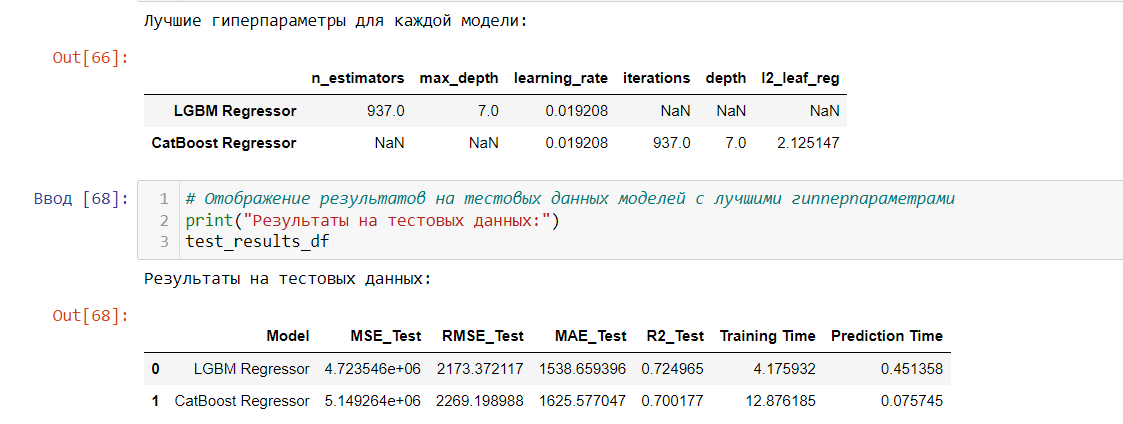